<a href="https://colab.research.google.com/github/Vishnup211/Covid-19-Analytics/blob/main/Covid_19_Analytics%2C_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sklearn

In [19]:
df=pd.read_csv('/content/worldometer_coronavirus_summary_data.csv')

In [24]:
data = pd.read_csv('/content/worldometer_coronavirus_daily_data.csv')

In [16]:
data.columns

Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths'],
      dtype='object')

In [4]:
df


,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277
...,...,...,...,...,...,...,...,...,...,...,...,...
221,Wallis And Futuna Islands,Australia/Oceania,454,7.0,438.0,9.0,NaN,41755,644.0,20508.0,1886140.0,10873
222,Western Sahara,Africa,10,1.0,9.0,0.0,NaN,16,2.0,NaN,NaN,624681
223,Yemen,Asia,11819,2149.0,9009.0,661.0,23.0,381,69.0,265253.0,8543.0,31049015
224,Zambia,Africa,320591,3983.0,315997.0,611.0,NaN,16575,206.0,3452554.0,178497.0,19342381


In [5]:
df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [7]:
df.columns

Index(['country', 'continent', 'total_confirmed', 'total_deaths',
       'total_recovered', 'active_cases', 'serious_or_critical',
       'total_cases_per_1m_population', 'total_deaths_per_1m_population',
       'total_tests', 'total_tests_per_1m_population', 'population'],
      dtype='object')

In [9]:
df.tail()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
221,Wallis And Futuna Islands,Australia/Oceania,454,7.0,438.0,9.0,NaN,41755,644.0,20508.0,1886140.0,10873
222,Western Sahara,Africa,10,1.0,9.0,0.0,NaN,16,2.0,NaN,NaN,624681
223,Yemen,Asia,11819,2149.0,9009.0,661.0,23.0,381,69.0,265253.0,8543.0,31049015
224,Zambia,Africa,320591,3983.0,315997.0,611.0,NaN,16575,206.0,3452554.0,178497.0,19342381
225,Zimbabwe,Africa,249206,5482.0,242417.0,1307.0,12.0,16324,359.0,2287793.0,149863.0,15265849


In [10]:
df.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,2.260000e+02,2.180000e+02,2.040000e+02,2.040000e+02,145.000000,226.000000,218.000000,2.120000e+02,2.120000e+02,2.260000e+02
mean,2.305651e+06,2.884442e+04,2.256851e+06,6.861029e+04,269.482759,148156.809735,1157.550459,2.987445e+07,1.944650e+06,3.495521e+07
std,7.575510e+06,9.971254e+04,7.613357e+06,2.350430e+05,883.174727,155202.909225,1212.833590,1.079635e+08,3.318400e+06,1.390338e+08
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.093000e+03,8.050000e+02
25%,2.412600e+04,2.370000e+02,1.619300e+04,2.397500e+02,5.000000,11748.250000,172.500000,3.472968e+05,1.667260e+05,5.605125e+05
50%,1.793750e+05,2.251500e+03,1.372740e+05,1.634000e+03,17.000000,98271.500000,768.000000,2.238918e+06,7.753355e+05,5.800570e+06
75%,1.090902e+06,1.400650e+04,1.006245e+06,1.929675e+04,139.000000,255632.750000,1850.000000,1.233862e+07,2.267408e+06,2.187284e+07
max,8.420947e+07,1.026646e+06,8.124426e+07,1.938567e+06,8318.000000,704302.000000,6297.000000,1.016883e+09,2.184247e+07,1.439324e+09


In [11]:
df.isnull().sum()

country                            0
continent                          0
total_confirmed                    0
total_deaths                       8
total_recovered                   22
active_cases                      22
serious_or_critical               81
total_cases_per_1m_population      0
total_deaths_per_1m_population     8
total_tests                       14
total_tests_per_1m_population     14
population                         0
dtype: int64

In [15]:
df.columns

Index(['country', 'continent', 'total_confirmed', 'total_deaths',
       'total_recovered', 'active_cases', 'serious_or_critical',
       'total_cases_per_1m_population', 'total_deaths_per_1m_population',
       'total_tests', 'total_tests_per_1m_population', 'population'],
      dtype='object')

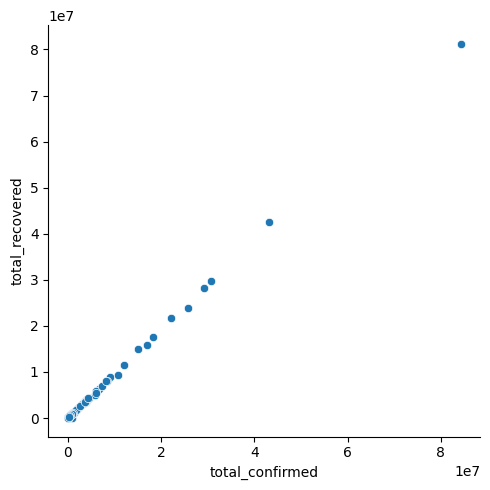

In [18]:
sns.relplot(x="total_confirmed",y="total_recovered",data=df)

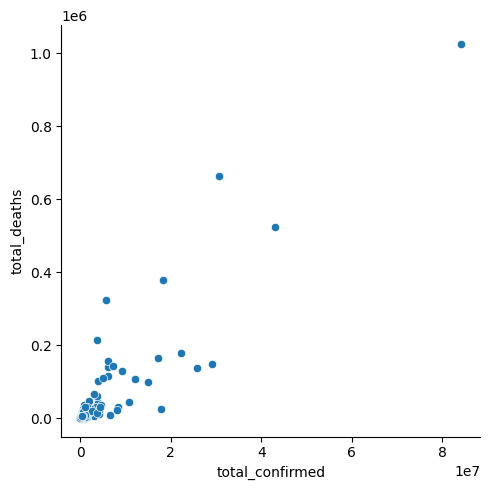

In [19]:
sns.relplot(x="total_confirmed",y="total_deaths",data=df)

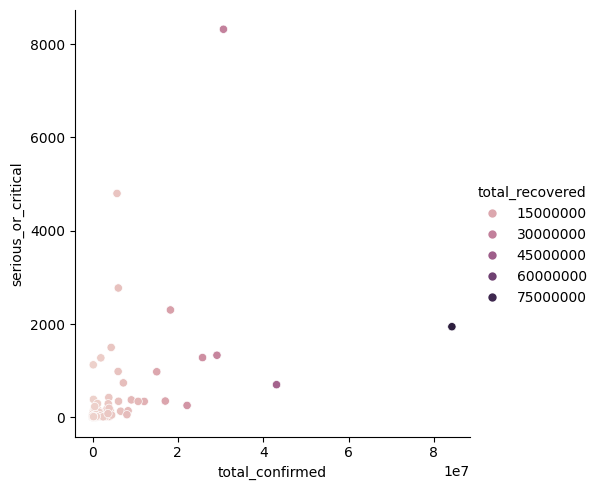

In [22]:
sns.relplot(x="total_confirmed",y="serious_or_critical",hue='total_recovered',data=df)

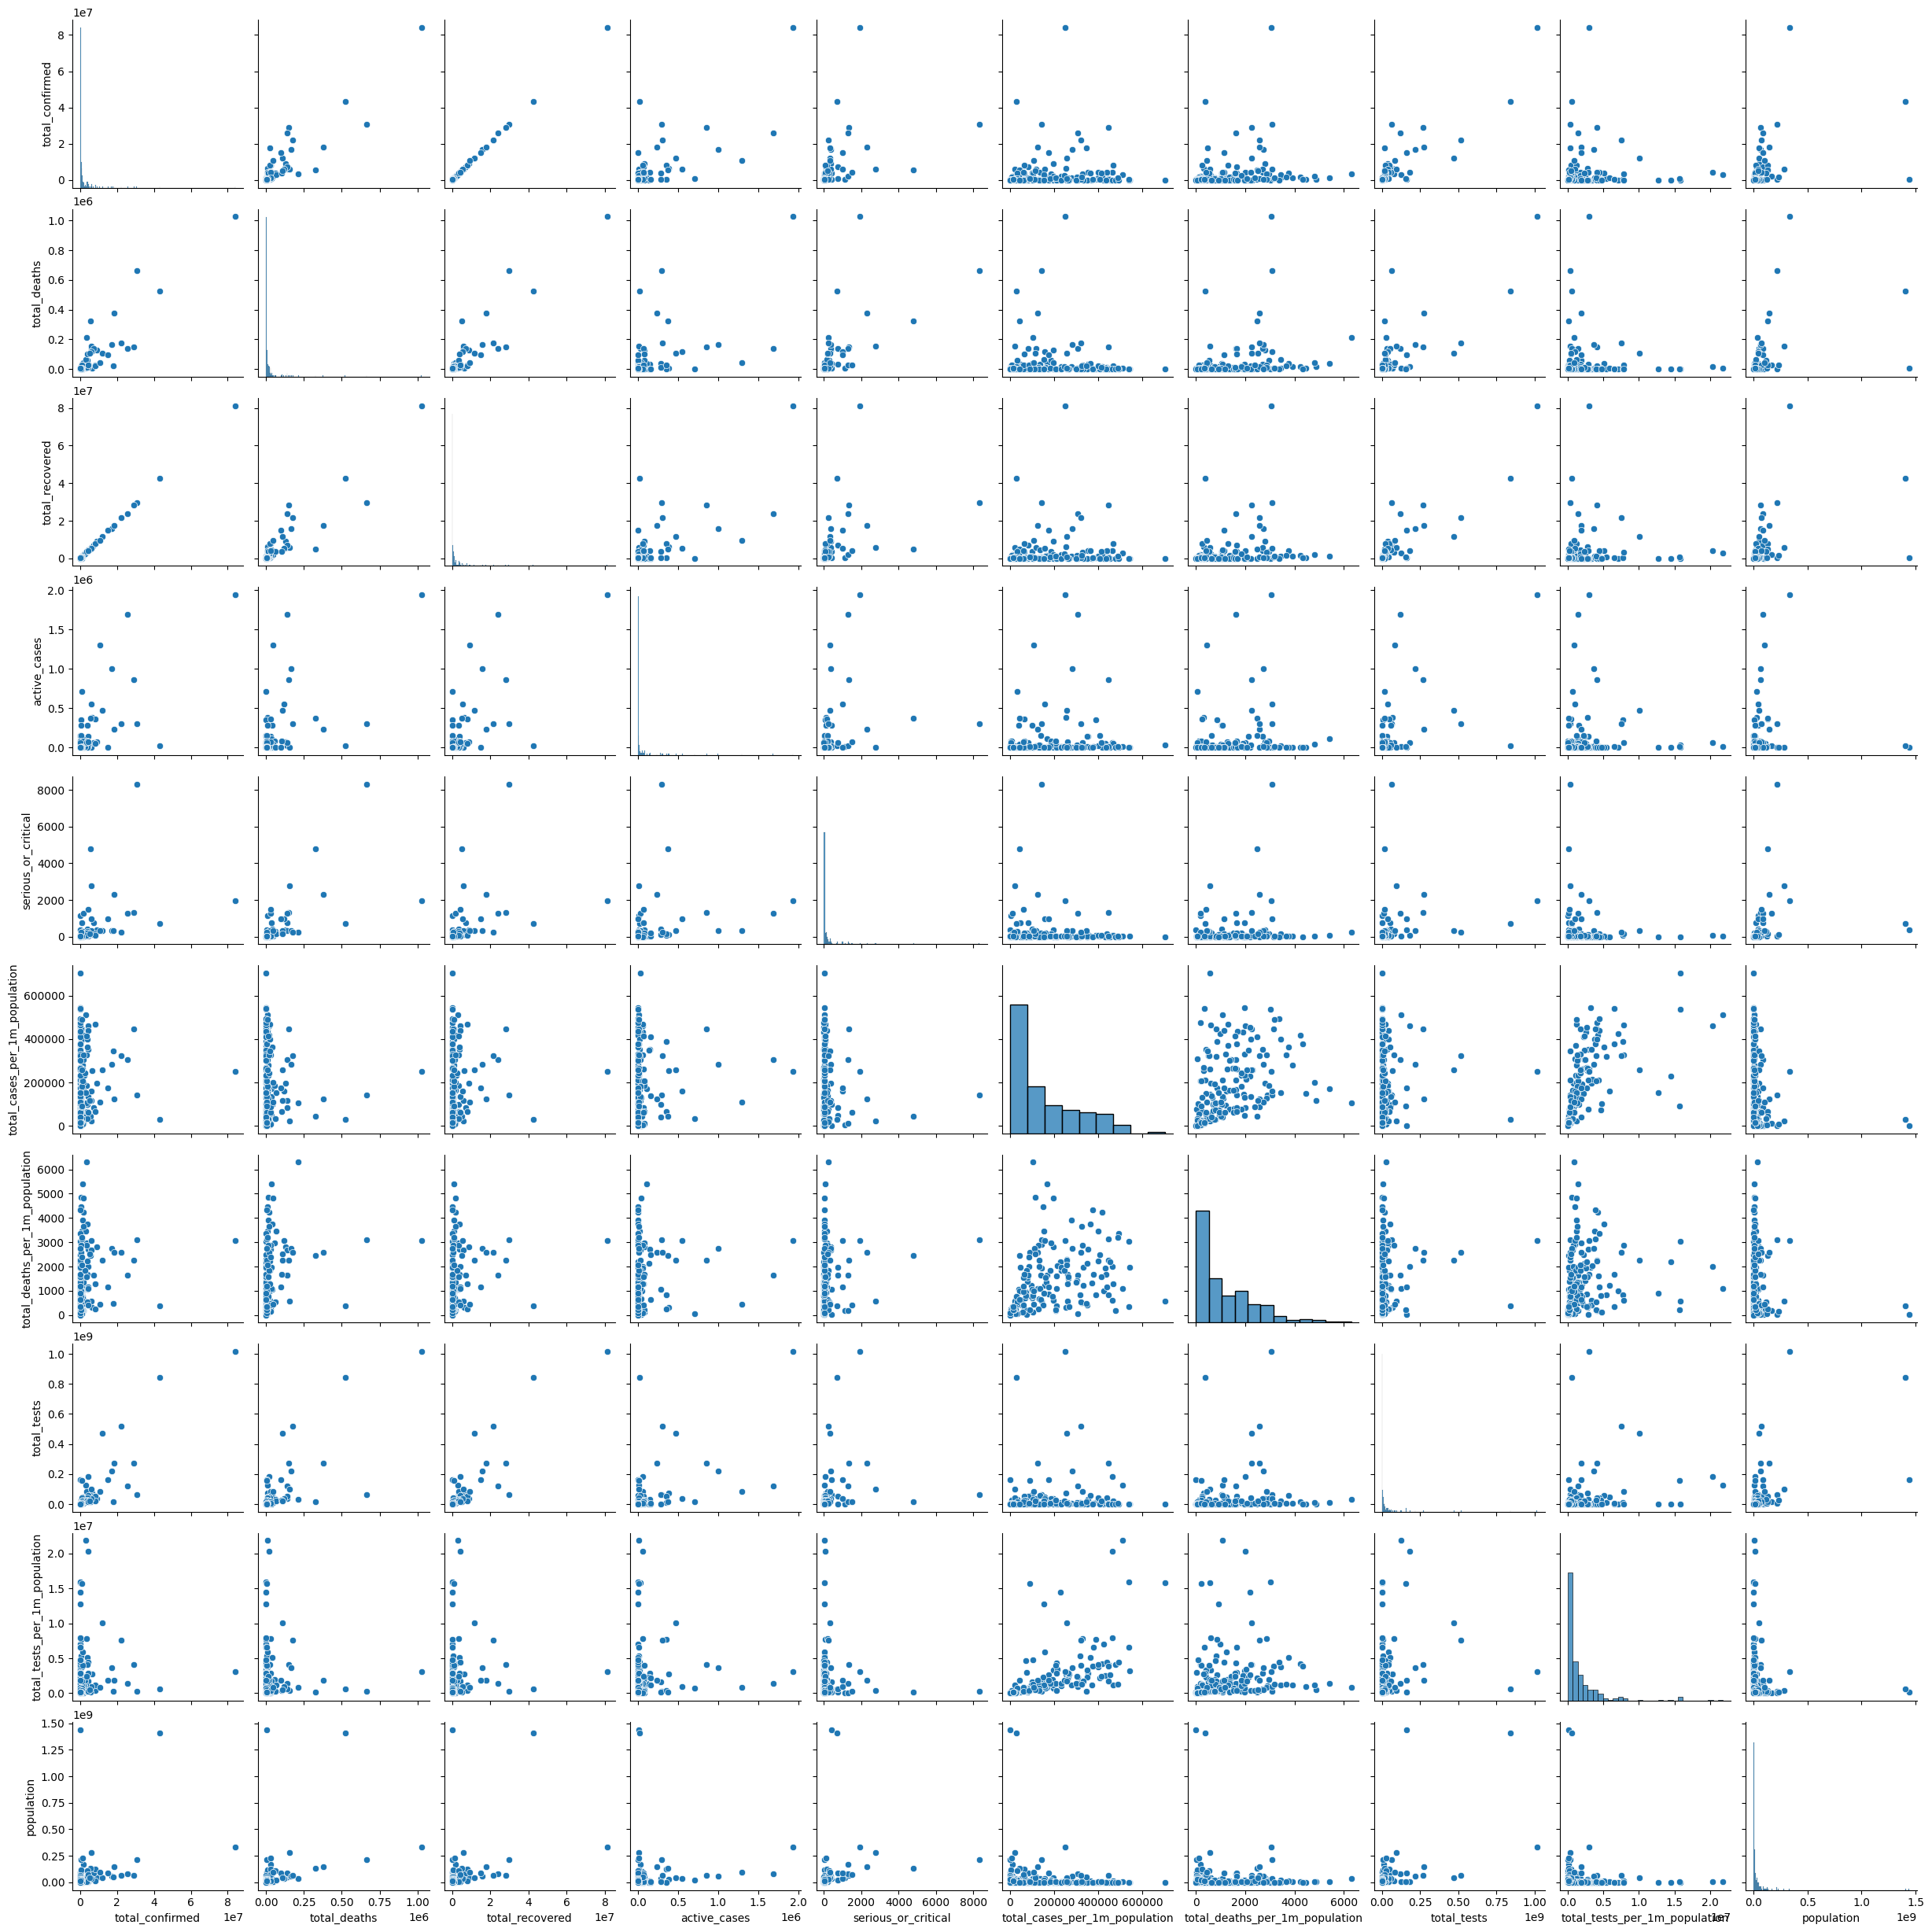

In [23]:
sns.pairplot(df)

In [27]:
df.columns

Index(['country', 'continent', 'total_confirmed', 'total_deaths',
       'total_recovered', 'active_cases', 'serious_or_critical',
       'total_cases_per_1m_population', 'total_deaths_per_1m_population',
       'total_tests', 'total_tests_per_1m_population', 'population'],
      dtype='object')

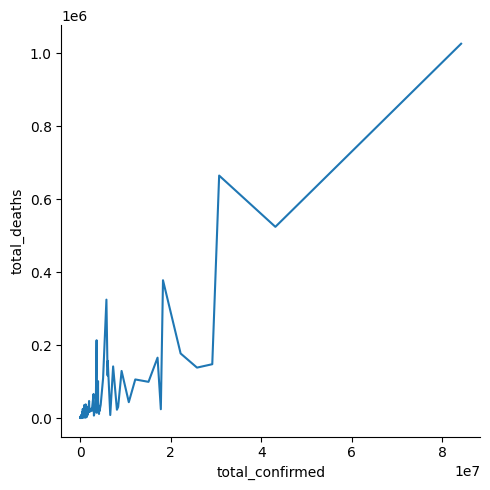

In [28]:
sns.relplot(x="total_confirmed",y="total_deaths",kind='line',data=df)

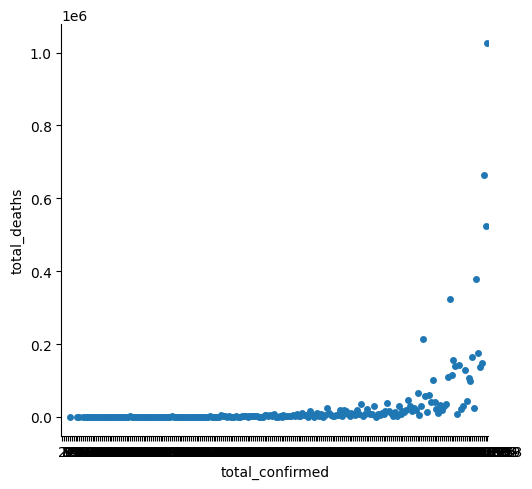

In [30]:
sns.catplot(x="total_confirmed",y="total_deaths",data=df)

To compare the impact of the India vs. the rest of the world, I am creating two pandas dataframes named India_data and global_data, so that I can easily model UIndian
 stats to the global stats

In [6]:
mask = df['country'] != 'India'
global_data = df[mask]


mask = df['country'] == 'India'
India_df = df[mask]


index = np.arange(0,len(India_df),1)
India_df = India_df.set_index(index)

index = np.arange(0,len(global_data),1)
global_data = global_data.set_index(index)

global_data['active_cases'] = global_data['active_cases'].fillna(0)

Visualiztion

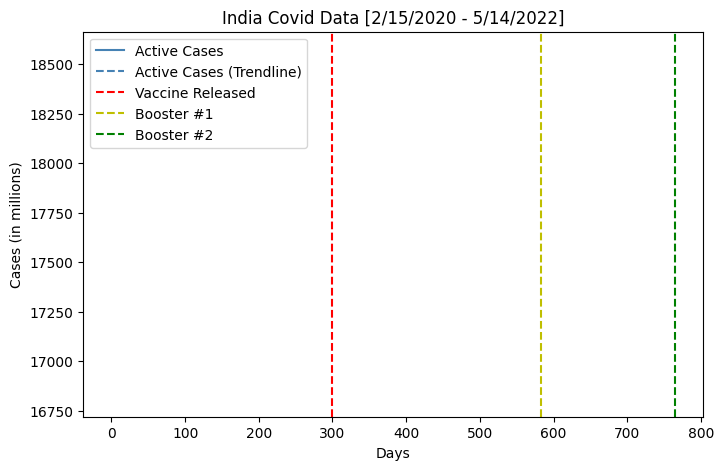

In [23]:
X = np.arange(0,len(India_df),1).reshape(-1,1)
y = India_df['active_cases']
model = LinearRegression().fit(X,y)
y_pred = model.predict(X)

plt.figure(figsize=(8,5))
plt.plot(India_df['active_cases'],label="Active Cases", color='steelblue')
plt.plot(y_pred,label="Active Cases (Trendline)",color='steelblue',linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Cases (in millions)')
plt.title("India Covid Data [2/15/2020 - 5/14/2022]")
plt.axvline(x=300,color='r',label='Vaccine Released',linestyle='dashed')
plt.axvline(x=583,color='y',label='Booster #1',linestyle='dashed')
plt.axvline(x=765,color='g',label='Booster #2',linestyle='dashed')
plt.legend()
plt.show()
